In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('TensorFlow_FILES/DATA/cancer_classification.csv')

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


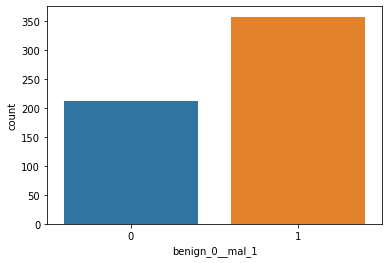

In [8]:
sns.countplot(x = 'benign_0__mal_1', data = df)

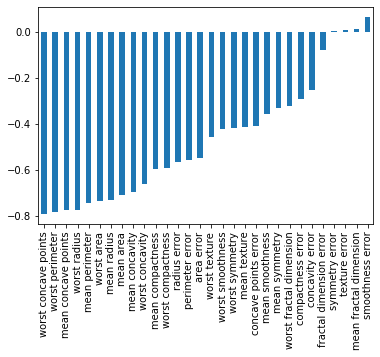

In [14]:
df.corr( )['benign_0__mal_1'][:-1].sort_values().plot(kind = 'bar')
#Highly negatively correlated values

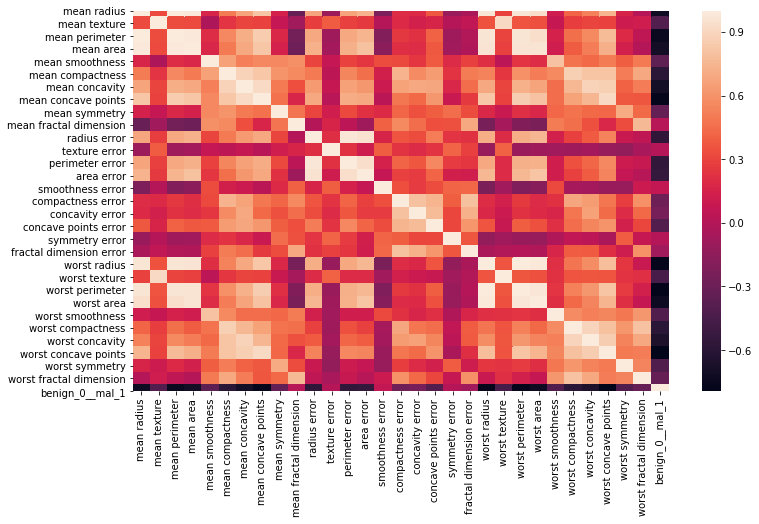

In [16]:
plt.figure(figsize= (12,7))
sns.heatmap(df.corr())

In [18]:
X = df.drop('benign_0__mal_1', axis =1).values
y = df['benign_0__mal_1'].values

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
 X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=101)

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler( )

In [23]:
X_train = scaler.fit_transform(X_train)

In [24]:
X_test = scaler.transform(X_test)

In [26]:
from tensorflow.keras.models import Sequential

In [27]:
from tensorflow.keras.layers import Dense

In [28]:
X_train.shape

(426, 30)

In [30]:
model = Sequential( )

model.add(Dense(30, activation = 'relu'))

model.add(Dense(15, activation = 'relu'))

#Binary Classification Problem, hence use Sigmoid
model.add(Dense(1, activation = 'sigmoid'))

model.compile (loss = 'binary_crossentropy', optimizer = 'adam')

In [31]:
model.fit(x = X_train, y=y_train, epochs = 600, validation_data=(X_test, y_test))

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6710 - val_loss: 0.6517
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6382 - val_loss: 0.6193
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6054 - val_loss: 0.5855
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5691 - val_loss: 0.5464
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5279 - val_loss: 0.5006
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4803 - val_loss: 0.4490
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4270 - val_loss: 0.3950
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3830 - val_loss: 0.3513
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3423 - val_loss: 0.3142
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3101 - val_loss: 0.2853
Epoch 11/

14/14 [==============================] - 0s 2ms/step - loss: 0.0554 - val_loss: 0.1172
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0535 - val_loss: 0.1203
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0537 - val_loss: 0.1193
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0526 - val_loss: 0.1179
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0539 - val_loss: 0.1229
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0527 - val_loss: 0.1234
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0525 - val_loss: 0.1326
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0524 - val_loss: 0.1195
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0519 - val_loss: 0.1256
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0506 - val_loss: 0.1194
Epoch 93/600


14/14 [==============================] - 0s 2ms/step - loss: 0.0404 - val_loss: 0.1372
Epoch 165/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0400 - val_loss: 0.1406
Epoch 166/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0399 - val_loss: 0.1429
Epoch 167/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0401 - val_loss: 0.1410
Epoch 168/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0405 - val_loss: 0.1320
Epoch 169/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0427 - val_loss: 0.1494
Epoch 170/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0396 - val_loss: 0.1307
Epoch 171/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0408 - val_loss: 0.1622
Epoch 172/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0424 - val_loss: 0.1292
Epoch 173/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0410 - val_loss: 0.1431
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0329 - val_loss: 0.1528
Epoch 246/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0317 - val_loss: 0.1440
Epoch 247/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0312 - val_loss: 0.1519
Epoch 248/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0315 - val_loss: 0.1449
Epoch 249/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0330 - val_loss: 0.1486
Epoch 250/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0328 - val_loss: 0.1518
Epoch 251/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0373 - val_loss: 0.1433
Epoch 252/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0335 - val_loss: 0.1438
Epoch 253/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0341 - val_loss: 0.1573
Epoch 254/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0322 - val_loss: 0.1488
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0255 - val_loss: 0.1487
Epoch 327/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0257 - val_loss: 0.1598
Epoch 328/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0242 - val_loss: 0.1560
Epoch 329/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0272 - val_loss: 0.1687
Epoch 330/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0247 - val_loss: 0.1598
Epoch 331/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0246 - val_loss: 0.1627
Epoch 332/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0248 - val_loss: 0.1505
Epoch 333/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0248 - val_loss: 0.1536
Epoch 334/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0250 - val_loss: 0.1622
Epoch 335/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0251 - val_loss: 0.1554
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0221 - val_loss: 0.1664
Epoch 408/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0325 - val_loss: 0.1476
Epoch 409/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0272 - val_loss: 0.1973
Epoch 410/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0213 - val_loss: 0.1514
Epoch 411/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0251 - val_loss: 0.2008
Epoch 412/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0205 - val_loss: 0.1545
Epoch 413/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0213 - val_loss: 0.1959
Epoch 414/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0200 - val_loss: 0.1530
Epoch 415/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0204 - val_loss: 0.1804
Epoch 416/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0205 - val_loss: 0.1680
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0156 - val_loss: 0.1746
Epoch 489/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0167 - val_loss: 0.1843
Epoch 490/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0147 - val_loss: 0.1724
Epoch 491/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0164 - val_loss: 0.1958
Epoch 492/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0226 - val_loss: 0.1586
Epoch 493/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0180 - val_loss: 0.2020
Epoch 494/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0163 - val_loss: 0.1702
Epoch 495/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0153 - val_loss: 0.1819
Epoch 496/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0144 - val_loss: 0.1738
Epoch 497/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0145 - val_loss: 0.1810
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0332 - val_loss: 0.1820
Epoch 570/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0137 - val_loss: 0.2019
Epoch 571/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0150 - val_loss: 0.2120
Epoch 572/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0180 - val_loss: 0.1857
Epoch 573/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0135 - val_loss: 0.1998
Epoch 574/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0120 - val_loss: 0.1958
Epoch 575/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0130 - val_loss: 0.2082
Epoch 576/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0136 - val_loss: 0.1843
Epoch 577/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0168 - val_loss: 0.2101
Epoch 578/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0154 - val_loss: 0.2178
Epoc

In [33]:
losses = pd.DataFrame(model.history.history)

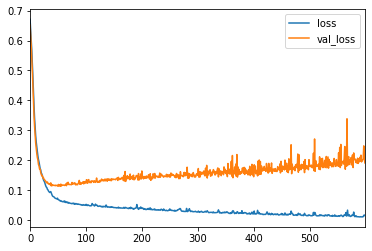

In [36]:
losses.plot()
#Typical overfitting of the model

In [37]:
model = Sequential( )

model.add(Dense(30, activation = 'relu'))

model.add(Dense(15, activation = 'relu'))

#Binary Classification Problem, hence use Sigmoid
model.add(Dense(1, activation = 'sigmoid'))

model.compile (loss = 'binary_crossentropy', optimizer = 'adam')

In [38]:
from tensorflow.keras.callbacks import EarlyStopping

In [40]:
#help(EarlyStopping)

In [41]:
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose =1, patience = 25)

In [42]:
model.fit(x = X_train, y=y_train, epochs = 600, validation_data=(X_test, y_test),
         callbacks = [early_stop])

Epoch 1/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6969 - val_loss: 0.6707
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6493 - val_loss: 0.6287
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6049 - val_loss: 0.5897
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5628 - val_loss: 0.5441
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5135 - val_loss: 0.4881
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4592 - val_loss: 0.4354
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4086 - val_loss: 0.3879
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3644 - val_loss: 0.3418
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3252 - val_loss: 0.3033
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.2915 - val_loss: 0.2710
Epoch 11/

In [43]:
model_loss = pd.DataFrame(model.history.history)

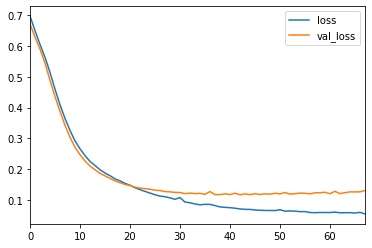

In [44]:
model_loss.plot()

In [45]:
#Add in drop-out layers to prevent overfitting

In [47]:
from tensorflow.keras.layers import Dropout

In [48]:
model = Sequential( )

model.add(Dense(30, activation = 'relu'))
#Choose the numbers of random neurons to be turned off per layer during each training batch
model.add(Dropout(0.5))

model.add(Dense(15, activation = 'relu'))
model.add(Dropout(0.5))

#Binary Classification Problem, hence use Sigmoid
model.add(Dense(1, activation = 'sigmoid'))

model.compile (loss = 'binary_crossentropy', optimizer = 'adam')

In [49]:
model.fit(x = X_train, y=y_train, epochs = 600, validation_data=(X_test, y_test),
         callbacks = [early_stop])

Epoch 1/600
14/14 [==============================] - 0s 7ms/step - loss: 0.7264 - val_loss: 0.6796
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6899 - val_loss: 0.6653
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6673 - val_loss: 0.6463
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6524 - val_loss: 0.6265
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6395 - val_loss: 0.6046
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6238 - val_loss: 0.5834
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6024 - val_loss: 0.5586
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5822 - val_loss: 0.5316
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5614 - val_loss: 0.5007
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5262 - val_loss: 0.4635
Epoch 11/

14/14 [==============================] - 0s 2ms/step - loss: 0.1132 - val_loss: 0.0851
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0971 - val_loss: 0.1183
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1137 - val_loss: 0.0890
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1196 - val_loss: 0.0938
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1066 - val_loss: 0.1003
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1097 - val_loss: 0.1000
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1061 - val_loss: 0.0856
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1152 - val_loss: 0.0891
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1196 - val_loss: 0.1096
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0912 - val_loss: 0.0829
Epoch 93/600


In [50]:
model_loss = pd.DataFrame(model.history.history)

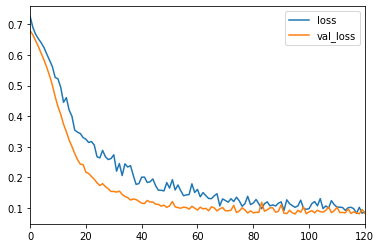

In [51]:
model_loss.plot()

In [52]:
#Adding the early stops and the drop-out neurons has significantly improved the model performance

In [54]:
predictions = model.predict_classes(X_test)

In [55]:
from sklearn.metrics import classification_report, confusion_matrix

In [56]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        55
           1       0.99      0.99      0.99        88

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [57]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 1 87]]
